In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Using Google Drive to Load CSV
# from google.colab import drive

# drive.mount('/content/drive')

#### Part I - Data Preparation and Wrangling

***Data Loading and Preparation***:

  - Are there any missing values? Ideally, there shouldn't be any.
  - Are there any variables which are of an incorrect datatype? For e.g. categorical columns are stored as integers in the data set. In case you encounter such issues, make sure you convert the columns to the correct datatypes.

In [3]:
# Load the dataset

# If using Google Drive
# df = pd.read_csv('/content/drive/MyDrive/[01] Personal/[01] Education/[04] PGDM in Data Science/Case Studies/[04] Mobile App Efficacy/data_app.csv')

# If using on Local Machine
df = pd.read_csv("data_app.csv")

In [4]:
# Check the non-null and empty values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   4000 non-null   int64 
 1   Adopt        4000 non-null   int64 
 2   Gender       4000 non-null   object
 3   Age          4000 non-null   int64 
 4   Nationality  4000 non-null   int64 
 5   Loyalty      4000 non-null   int64 
 6   Tenure       4000 non-null   int64 
 7   Post         4000 non-null   int64 
 8   NumBookings  4000 non-null   int64 
 9   Spending     4000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 312.6+ KB


Columns, "Adopt","Post" and "Nationality" are boolean and not integers as per the data dictionary shared.

##### Record your observations

In [5]:
# Convert the Adopt and Nationality columns to boolean datatype
df["Adopt"] = df["Adopt"].astype(bool)
df["Nationality"] = df["Nationality"].astype(bool)
df["Post"] = df["Post"].astype(bool)

In [6]:
# Check the datatypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   4000 non-null   int64 
 1   Adopt        4000 non-null   bool  
 2   Gender       4000 non-null   object
 3   Age          4000 non-null   int64 
 4   Nationality  4000 non-null   bool  
 5   Loyalty      4000 non-null   int64 
 6   Tenure       4000 non-null   int64 
 7   Post         4000 non-null   bool  
 8   NumBookings  4000 non-null   int64 
 9   Spending     4000 non-null   int64 
dtypes: bool(3), int64(6), object(1)
memory usage: 230.6+ KB


**Summary**

The data is clean with zero NULL values. The data types for the boolean columns have been corrected from Integer to Boolean.



#### Part II: Exploratory Data Analysis

***Univariate Analysis I: Data summary of customers’ characteristics***

   - Use appropriate tables for the summary statistics and charts and describe the customers’ characteristics. You may restrict yourself to the univariate analysis of these variables:

          - Demographics: Gender, age, nationality
          - Loyalty membership and tenure with the hotel chain (in months)

In [7]:
# Create a separate dataset for Post=0
P0=df[df['Post']==0]

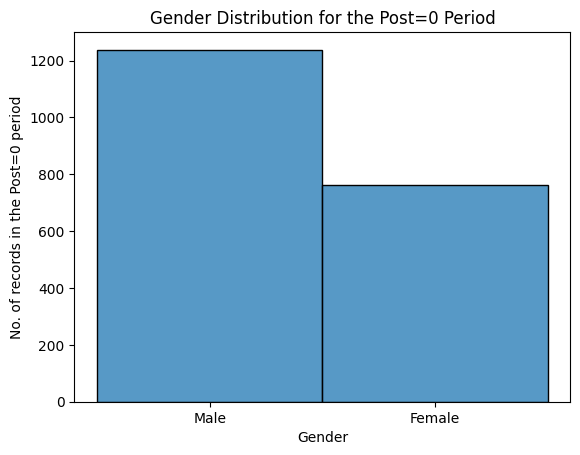

In [8]:
# Check for Frequency counts for genders in Post=0 Period
ax = sns.histplot(data=P0,x='Gender')
ax.set_xlabel("Gender")
ax.set_ylabel("No. of records in the Post=0 period")
plt.title("Gender Distribution for the Post=0 Period")

plt.show()

C:\Users\Pratyush Srivastava\AppData\Local\Temp\ipykernel_2684\1994913380.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'US Resident' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  P0.loc[P0["Nationality"] == 1, "Nationality"] = "US Resident"


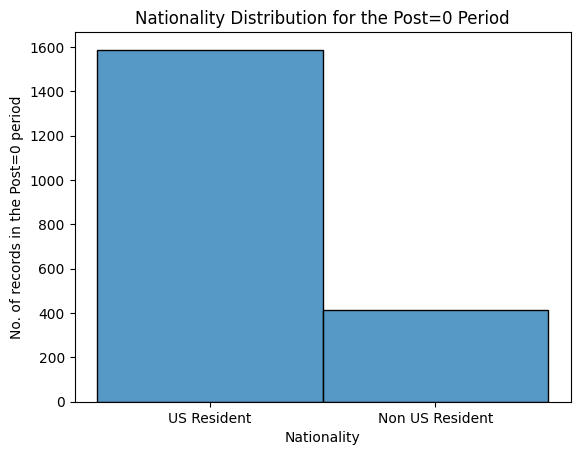

In [9]:
# Check the frequency counts for the Nationality in Post=0 period
P0.loc[P0["Nationality"] == 1, "Nationality"] = "US Resident"
P0.loc[P0["Nationality"] == 0, "Nationality"] = "Non US Resident"

# Again creating a histogram to see the distribution of records in the Post=0 Period
ax = sns.histplot(data=P0,x='Nationality')
ax.set_xlabel("Nationality")
ax.set_ylabel("No. of records in the Post=0 period")
plt.title("Nationality Distribution for the Post=0 Period")

plt.show()

C:\Users\Pratyush Srivastava\AppData\Local\Temp\ipykernel_2684\2240580353.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Basic Membership' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  P0.loc[P0["Loyalty"] == 1, "Loyalty"] = "Basic Membership"


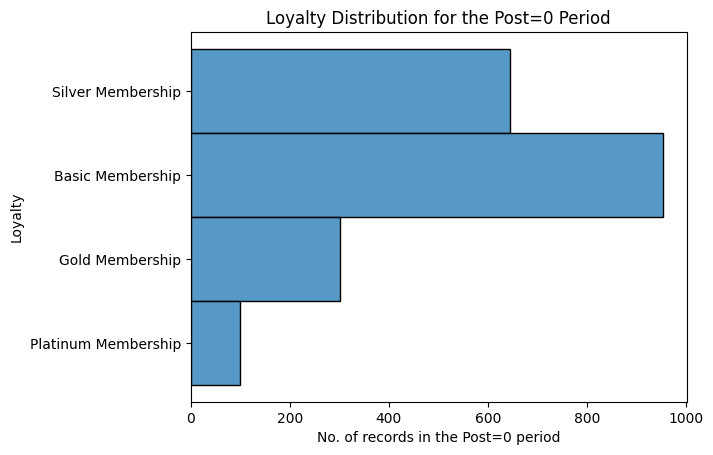

In [10]:
# Check Frequency Counts for the Loyalty in Post=0 period
P0.loc[P0["Loyalty"] == 1, "Loyalty"] = "Basic Membership"
P0.loc[P0["Loyalty"] == 2, "Loyalty"] = "Silver Membership"
P0.loc[P0["Loyalty"] == 3, "Loyalty"] = "Gold Membership"
P0.loc[P0["Loyalty"] == 4, "Loyalty"] = "Platinum Membership"

ax = sns.histplot(data=P0,y='Loyalty')
ax.set_ylabel("Loyalty")
ax.set_xlabel("No. of records in the Post=0 period")
plt.title("Loyalty Distribution for the Post=0 Period")

plt.show()

<Axes: xlabel='Age'>

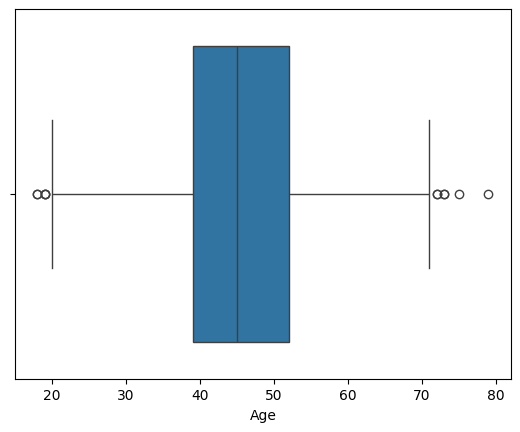

In [11]:
# Create a box plot for the Age column
sns.boxplot(data=P0,x="Age")

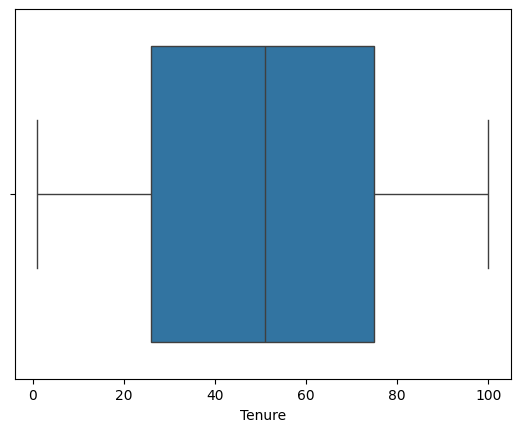

In [12]:
# Create a box plot for the Tenure column
ax = sns.boxplot(data=P0,x="Tenure")

**Summary:**

1. 60% of the people are Male and 40% are Female.
2. 80% of the people are US Residents and 20% are Non-Residents
3. 48% of the people are on Basic Membership, 30% members are Silver membership, 15% are on Gold membership and 7% only are on Platinum Membership
4. 50% of the people are between the age 40 and 50. 25% of the people are between 50 to 70 and other 25% are between 20 and 40. Some outliers exist which are above 70 and less than 20.
5. 50% of the people choose tenure between 25 to 75.

#### Part II: Exploratory Data Analysis

***Univariate Analysis II: Data summary of customers’ purchase behavior***

   - Use appropriate tables for the summary statistics and graphs and describe customers’ purchase behavior. You may restrict yourself to the univariate analysis of these variables::

          - Amount spent [Spending]
          - Number of bookings [NumBookings]

In [13]:
# Re-creating the P0 and P1 Variables
P0 = df[df['Post']==0]
P1 = df[df['Post']==1]

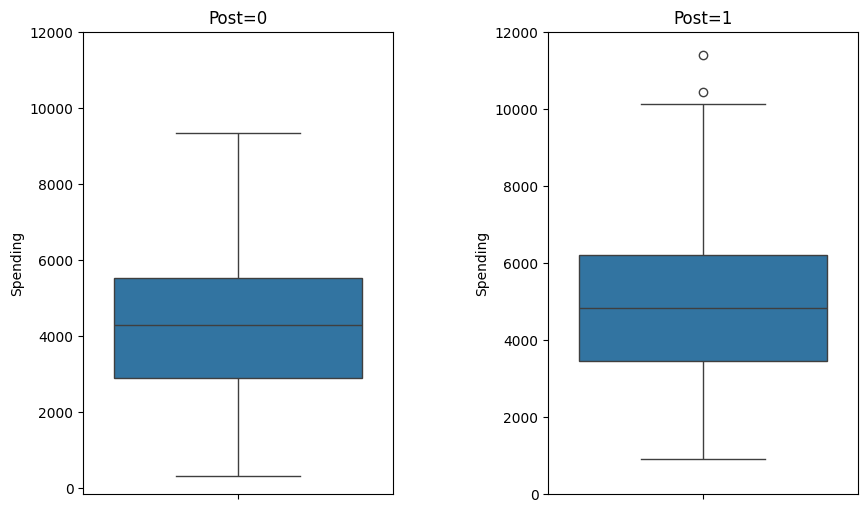

In [14]:
# Create two subplots showing difference in spending for Post=0 and Post=1
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax1 = sns.boxplot(data=P0,y='Spending',ax=ax[0])
ax2 = sns.boxplot(data=P1,y='Spending',ax=ax[1])
ticks = np.arange(0, 14000, 2000)

ax1.set_yticks(ticks=ticks,labels=ticks)
ax2.set_yticks(ticks=ticks,labels=ticks)
ax1.set_title("Post=0")
ax2.set_title("Post=1")

plt.subplots_adjust(wspace=0.5)

plt.show()

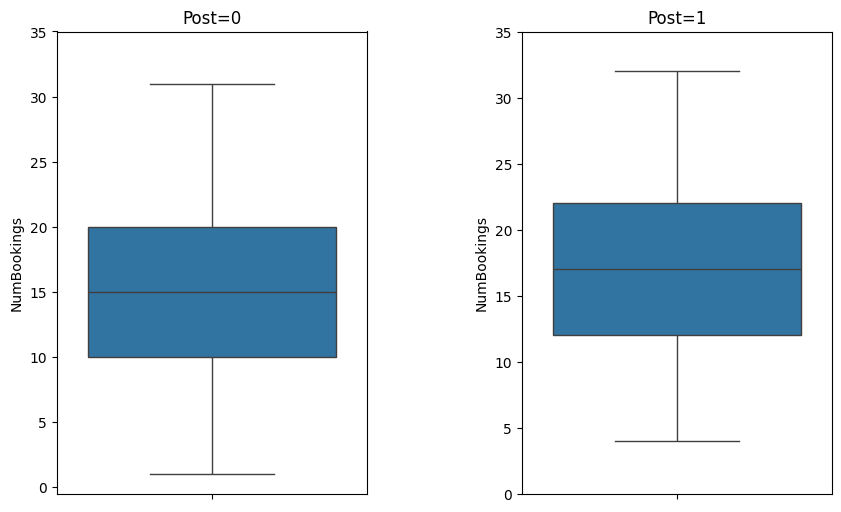

In [15]:
# Create two subplots showing difference in number of bookings for Post=0 and Post=1
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax1 = sns.boxplot(data=P0,y='NumBookings',ax=ax[0])
ax2 = sns.boxplot(data=P1,y='NumBookings',ax=ax[1])
ticks = np.arange(0, 40, 5)

ax1.set_yticks(ticks=ticks,labels=ticks)
ax2.set_yticks(ticks=ticks,labels=ticks)
ax1.set_title("Post=0")
ax2.set_title("Post=1")

plt.subplots_adjust(wspace=0.5)

plt.show()

**Summary:**

1. The amount spent before posting the app and after posting the app has increased by around 1000 on average
2. The number of bookings have also increased after posting the app by 3 on average

***Multivariate Analysis:***

   - Construct relevant pivot tables, bar charts, and scatterplots to get a preliminary understanding of the relationship between customers’ characteristics and their purchase behavior. (Generally, bar charts are more informative in the case of categorical variables [e.g., the average of Spending broken up by Gender], while scatterplots convey more information in the case of numerical variables [e.g., Spending versus Age])

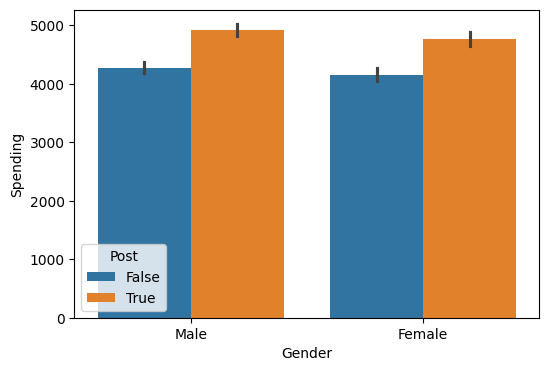

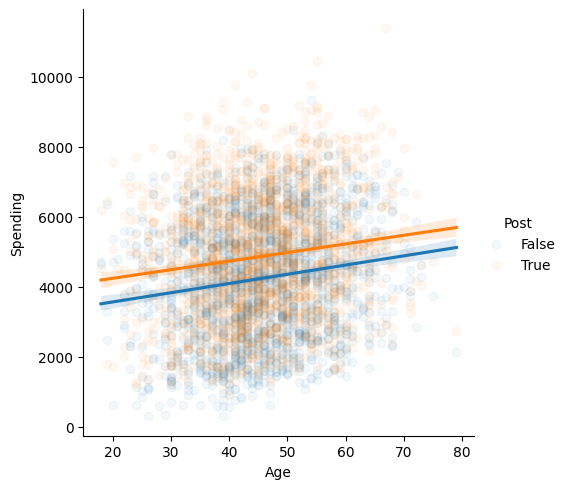

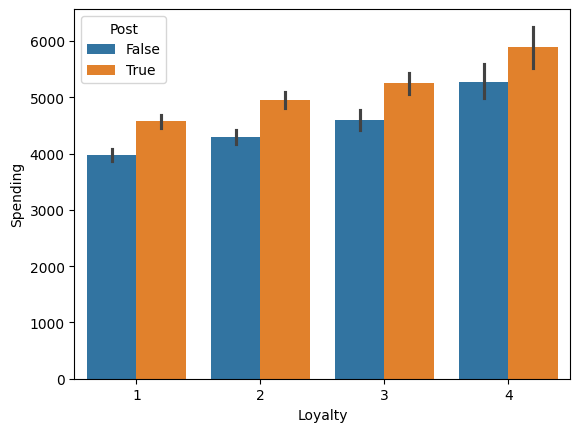

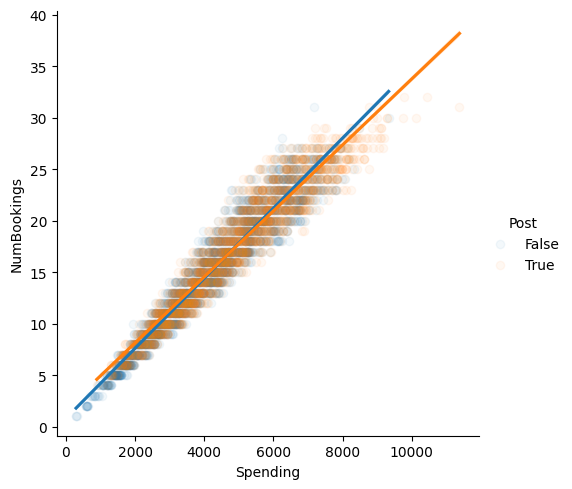

In [16]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plot a bar graph between Gender and Spending compared for Post=0 and Post=1 period
sns.barplot(data=df,x='Gender',y='Spending',hue='Post')
plt.show()

# Plot a linear model graph between Age and Spending compared for Post=0 and Post=1 period
sns.lmplot(data=df,x='Age',y='Spending',hue='Post',scatter_kws={'alpha':0.05})
plt.show()

# Plot a bar graph for Loyalty and Spending
sns.barplot(data=df,x='Loyalty',y='Spending',hue='Post')
plt.show()

# Plot a linear model graph between Spending and NumBookings compared for Post=0 and Post=1 period
sns.lmplot(data=df,x='Spending',y='NumBookings',hue='Post',scatter_kws={'alpha':0.05})
plt.show()

- Generate a table of the correlations of all numerical variables of the data set.



<Axes: >

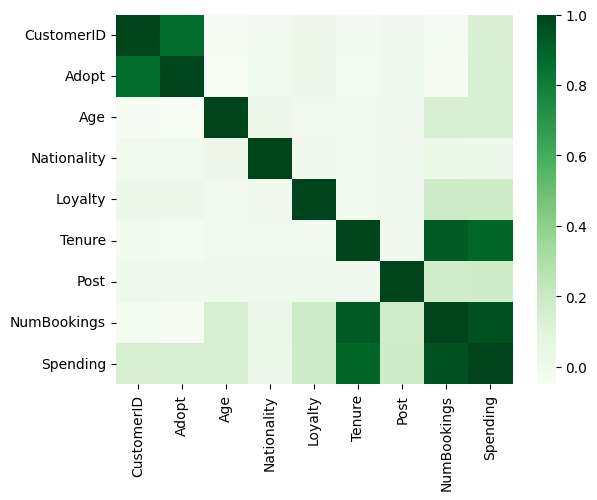

In [17]:
### Subset the dataframe to only include the numerical variables
### After that you can create a correlation matrix.
### If you want, you can also build a HeatMap, but it's optional.

corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Greens')

**Summary:**

*   Tenure is highly correlated with Number of bookings and Spending
*   Number of bookings and Spending are also highly correlated to each other.

---




 - Determine whether there is a statistically significant difference between the average spending of men and women (at a 5% significance level)? Conduct an appropriate hypothesis test to determine whether there is a difference in means. Please construct a 95% confidence interval for the difference in means. You may assume independent samples and constant variance. [Note: The above test is to be conducted for the entire data set]

In [ ]:
!pip install pingouin

In [ ]:
# Import Pingoin module
import pingouin as pg

In [ ]:
# Performing a individual t-test
pg.ttest(x=P0.Spending,y=P1.Spending,alternative='two-sided',confidence=0.95)

The p-value of the test is less than the significance level of 5%. Therefore, we can reject the NULL hypothesis.

H0: There is no difference in mean spending before and after the posting of the app
H1: There is a difference in mean spending before and after the posting for the app

#### Part III: Statistical Analysis

***After-Only design***
   - To determine the treatment effect of customers’ adoption of the app on their spending with the hotel chain, construct a pivot table of average Spending broken up by Adopt and Post. What is the difference between the treatment and control groups’ spending in the Post =1 period? This is the treatment effect, assuming the experiment is of an After-Only design.

In [ ]:
### WRITE CODE FOR CONSTRUCTING A PIVOT TABLE
### Hint - Check the documentation of pivot table
pivot_table = pd.pivot_table(df, values='Spending', index='Adopt', columns='Post', aggfunc='mean')
pivot_table

### Report the difference between the spending of treatment and control groups in Post = 1 period.

After the post=1 period, the average spending on the app before adoption of the new app was 4388\$ and after the user adopted the app, the average spending went up by 1000\$ to 5336\$

  - Is the above treatment effect statistically significant? Perform the necessary hypothesis test and construct a 95% confidence interval for the difference. Take the level of significance as 0.05

In [ ]:
### Hint - Once again, you can use the ttest method in the pingouin package to perform this task quickly.
pg.ttest(x=P0.Spending,y=P1.Spending,alternative='two-sided',confidence=0.95)

Let the average spending for the old app by u0 and the average spending for the new app be u1.

H0: u0-u1=0

H1: u0-u1!=0

As the p-value is less than the significance level 5% we can reject the NULL hypothesis. However, we will not come to any conclusions yet and continue the experiment.

***Before-After design***


- Construct a new DataFrame, where for each customer, you have a new variable, which is the difference in spending between the Post = 1 and Post= 0 periods.


In [ ]:
### This task can be slightly challenging and hence for performing this we have suggested the following approach
### Step 1 - Create 2 separate temporary dataframes, each filtered by Post = 1 and Post = 0 periods
P0 = df[df['Post'] == 0]
P1 = df[df['Post'] == 1]

### Step 2 - Merge these two dataframes using the pandas.merge() method based on the "CustomerID" and store this in a new Dataframe
merged_df = P0.merge(P1,left_on='CustomerID',right_on='CustomerID')
merged_df

### Step 3 - After merging, you may encounter repeated columns (denoted by a suffix like "_x" & "_y" ). Identify which ones you want to keep
###, and which ones you want to drop. Make sure you keep the Spending columns for both Post = 1 and Post = 0 periods.
merged_df_cleaned = merged_df[['CustomerID','Adopt_x','Gender_x','Age_x','Nationality_x','Loyalty_x','Tenure_x','Post_x','NumBookings_x','Spending_x','Spending_y']]
merged_df_cleaned

### Step 4 - In the new merged Dataframe, create a new column which is the difference between the Spending in Post = 1 and Post = 0 for each customer
merged_df_cleaned['Diff'] = merged_df_cleaned['Spending_x'] - merged_df_cleaned['Spending_y']

### For ease of use, you can name this column as "Diff". This will be useful in the final task of this section
merged_df_cleaned

The above suggested approach is one of the many ways in which you can complete this task. Here are some helpful links for understanding how to use the `pandas.merge` method
- [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)
- [Youtube tutorial](https://www.youtube.com/watch?v=h4hOPGo4UVU)

---

- Compute the average spending difference between those with Adopt = 1 and those with Adopt = 0 in both the Post = 1 and Post = 0 periods. Call these differences Difference1 and Difference0. Compute the difference between these two differences as Difference1 – Difference0. This is the treatment effect in the Before-After design.

In [ ]:
### To understand what why you're doing this, you can use the following image as a reference
### You have already learned this in the second session of the Designing Business Experiments module
### This is how you evaluate the treatment effect( or, Lift) in a Before-After Design

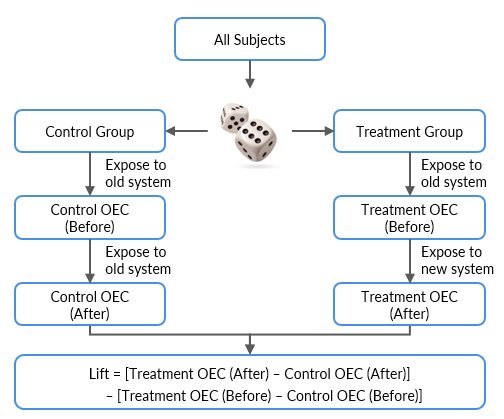

In case the above image isn't opening please use this [link](https://images.upgrad.com/48d5bfcc-c3e5-4ef3-9c5a-460568c08480-Image2.png)


In [ ]:
## Once you go through the image, the task is fairly straightforward to do. Here is one of the suggested approaches
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 0
p0_cm = P0.loc[P0['Adopt'] == 0,'Spending'].mean()

## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 0
p0_tm = P0.loc[P0['Adopt'] == 1,'Spending'].mean()

## Calculate the difference between the above two values. This will be Difference0 (or Treatment OEC(Before) - Control OEC (Before))
Difference0 = p0_tm - p0_cm

## After the above, repeat the same steps for Post = 1 period
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 1
p1_cm = P1.loc[P1['Adopt'] == 0,'Spending'].mean()

## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 1
p1_tm = P1.loc[P1['Adopt'] == 1,'Spending'].mean()

## Calculate the difference between the above two values. This will be Difference1 (or Treatment OEC(After) - Control OEC (After))
Difference1 = p1_tm - p1_cm

### Finally calculate the difference between these two values (Difference1 - Difference0) to obtain the treatment effect.
final_difference = Difference1 - Difference0
final_difference

- Is the above treatment effect statistically significant? Similar to the previous step, perform the necessary hypothesis test and construct a 95% confidence interval for the difference in differences. Take the level of significance as 0.05

In [ ]:
### Once again, you can peform this task using the pingouin package
### In addition, you can use the "Diff" column from new DataFrame that you created in the first task of this section
### This will help in providing inputs to the ttest method from pingouin package.
pg.ttest(x=merged_df_cleaned.loc[merged_df_cleaned['Adopt_x']==True,'Diff'],
         y=merged_df_cleaned.loc[merged_df_cleaned['Adopt_x']==False,'Diff'],
         paired=True,
         alternative='two-sided',confidence=0.95)

The p-value for the t-test paired samples is less than 5%. Therefore we can reject the NULL hypothesis and say that there is difference in the Spendings of customers after releasing the new application.